In [1]:
#Import the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Load the Dataset
df = pd.read_csv('BYD Stock Market Journey.csv')

df.head()

,date,open,high,low,close,adj_close,volume
0,2009-02-13 00:00:00-05:00,2.10,2.25,2.10,2.20,2.139941,55600
1,2009-02-17 00:00:00-05:00,2.06,2.10,2.00,2.10,2.042671,72100
2,2009-02-18 00:00:00-05:00,2.15,2.30,2.15,2.30,2.237211,36200
3,2009-02-19 00:00:00-05:00,2.25,2.25,2.11,2.20,2.139941,102400
4,2009-02-20 00:00:00-05:00,2.05,2.05,1.95,2.05,1.994036,78200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       4046 non-null   object 
 1   open       4046 non-null   float64
 2   high       4046 non-null   float64
 3   low        4046 non-null   float64
 4   close      4046 non-null   float64
 5   adj_close  4046 non-null   float64
 6   volume     4046 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 221.4+ KB


# Data Cleaning

In [4]:
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [5]:
df.duplicated().sum()

0

# Data Analysis

In [8]:
#1. Print all the records of open and high columns.
df[df['open'].astype(str).str.strip().str.lower() != ''][['open', 'high']].head(10)

,open,high
0,2.10,2.25
1,2.06,2.10
2,2.15,2.30
3,2.25,2.25
4,2.05,2.05
5,2.00,2.00
6,1.89,1.95
7,1.95,1.95
8,1.95,1.97
9,2.05,2.05


In [9]:
#2. Print all the records of low and close columns.
df[df['low'].astype(str).str.strip().str.lower() != ''][['low', 'close']].head(10)

,low,close
0,2.10,2.20
1,2.00,2.10
2,2.15,2.30
3,2.11,2.20
4,1.95,2.05
5,1.85,1.95
6,1.80,1.95
7,1.85,1.95
8,1.85,1.97
9,1.81,1.81


In [10]:
#3. Print all the records of adj_close and volume columns.
df[df['adj_close'].astype(str).str.strip().str.lower() != ''][['adj_close', 'volume']].head(10)

,adj_close,volume
0,2.139941,55600
1,2.042671,72100
2,2.237211,36200
3,2.139941,102400
4,1.994036,78200
5,1.896766,31700
6,1.896766,15200
7,1.896766,39900
8,1.916220,7100
9,1.760588,8200


# Data Visualization

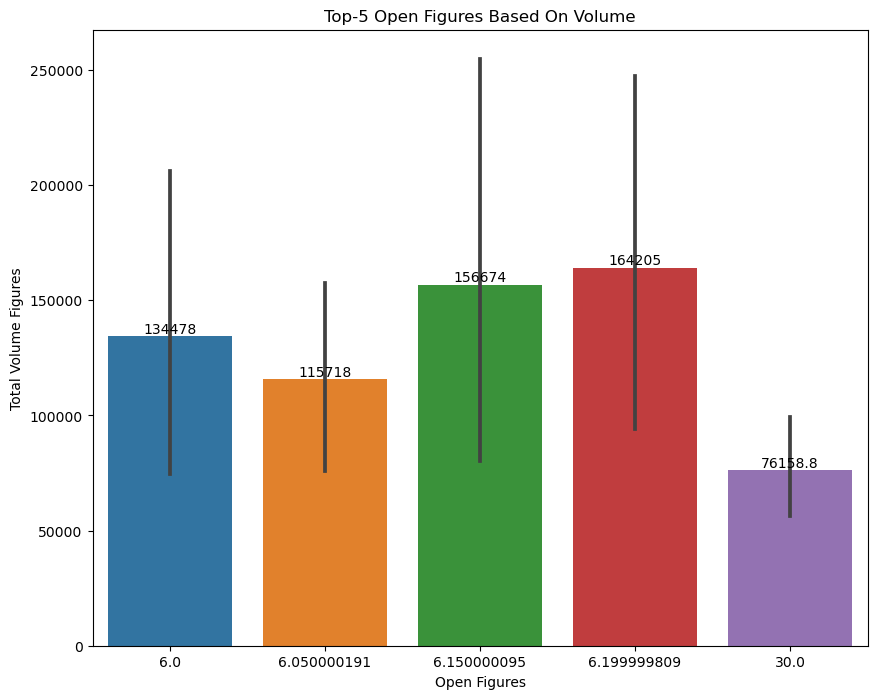

In [16]:
#1. Find out the Top 5 Open Figures Based On Volume.
top5 = df['open'].value_counts().nlargest(5).index
df_top5 = df[df['open'].isin(top5)]

plt.figure(figsize = (10,8))
ax = sns.barplot(x = 'open' , y = 'volume' , data = df_top5)
ax.bar_label(ax.containers[0])
plt.xlabel('Open Figures')
plt.ylabel('Total Volume Figures')
plt.title('Top-5 Open Figures Based On Volume')
plt.show()

In the above graph, the "6.199999809" has the most Opening Figures than other 4 Opening Figures.

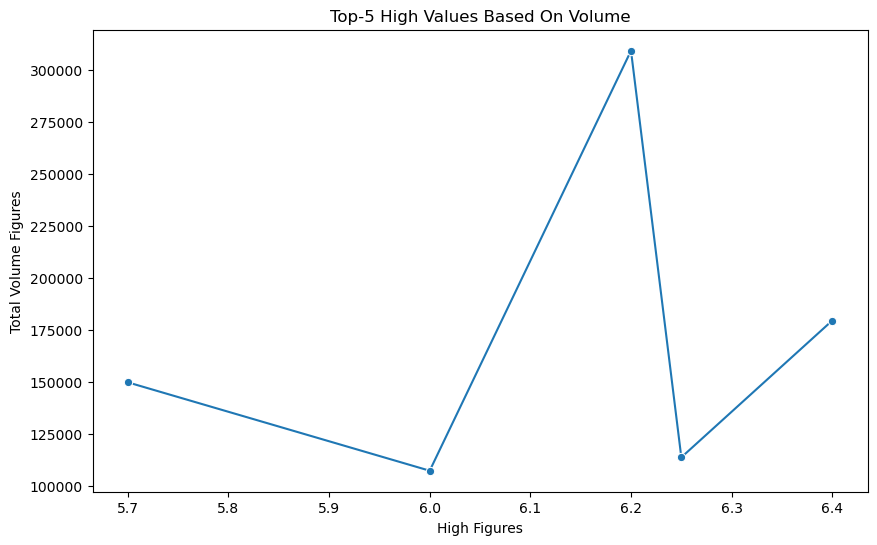

In [26]:
#2. Find out the Top 5 High Figures Based On Volume.
top5 = df['high'].value_counts().nlargest(5).index
df_top5 = df[df['high'].isin(top5)]

plt.figure(figsize=(10, 6))
sns.lineplot(x='high', y='volume', data=df_top5, marker='o', errorbar=None)
plt.title('Top-5 High Values Based On Volume')
plt.xlabel('High Figures')
plt.ylabel('Total Volume Figures')
plt.show()

In the above line graph, the highest trading volume corresponds to a 'high' value of around 6.2 which is the most highest figures.

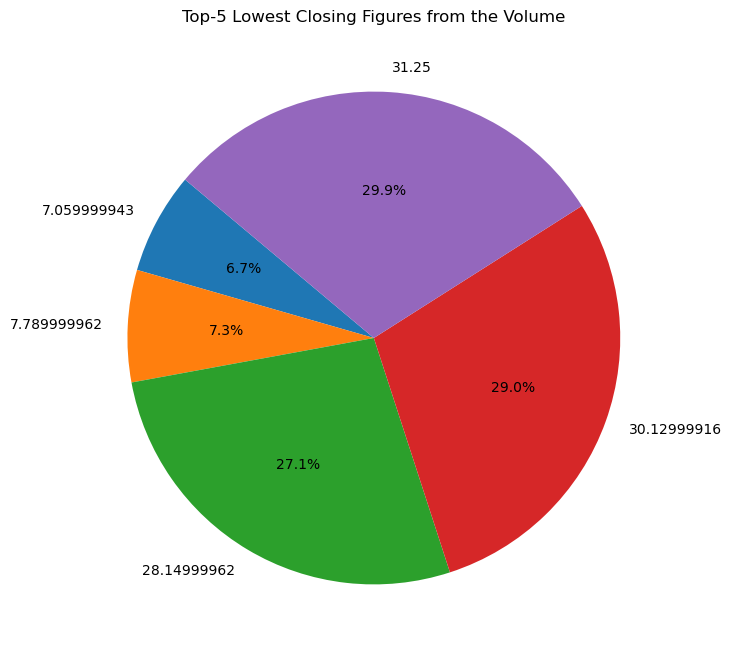

In [25]:
#3. Find the Top-5 lowest closing figure from the volume.
top5_low = df['low'].value_counts().nsmallest(5).index
df_top5_low = df[df['low'].isin(top5_low)]
volume_by_low = df_top5_low.groupby('low')['close'].sum()

plt.figure(figsize=(8, 8))
plt.pie(volume_by_low, labels=volume_by_low.index, autopct='%1.1f%%', startangle=140)
plt.title('Top-5 Lowest Closing Figures from the Volume')
plt.show()

In the above pie chart, "31.25" has the most Lowest Figures than other 4 Lowest Figure.

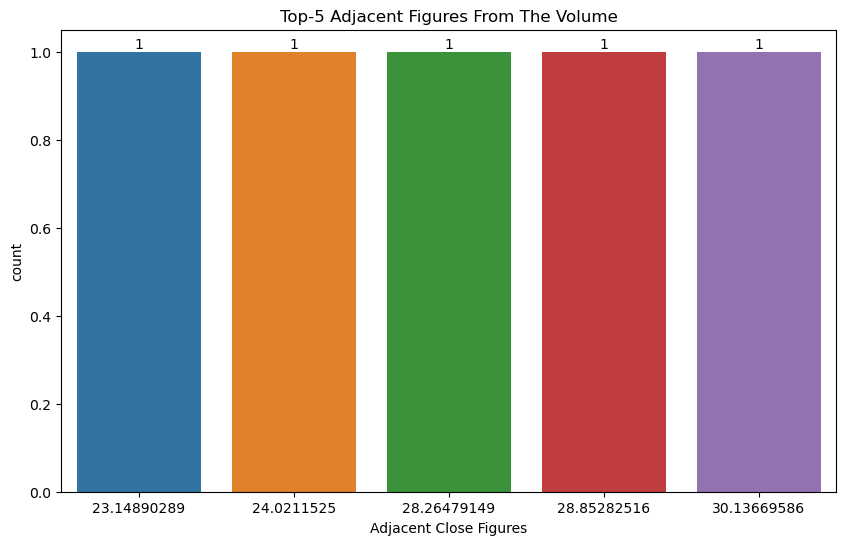

In [28]:
#4. Find the Top- 5 Adjacent Closing Figures from Volume.
top5_low = df['adj_close'].value_counts().nsmallest(5).index
df_top5_low = df[df['adj_close'].isin(top5_low)]

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='adj_close', data=df_top5_low)
ax.bar_label(ax.containers[0])
plt.xlabel('Adjacent Close Figures')
plt.title('Top-5 Adjacent Figures From The Volume')
plt.show()

In the above graph, all Adjacent Close Figures are same.

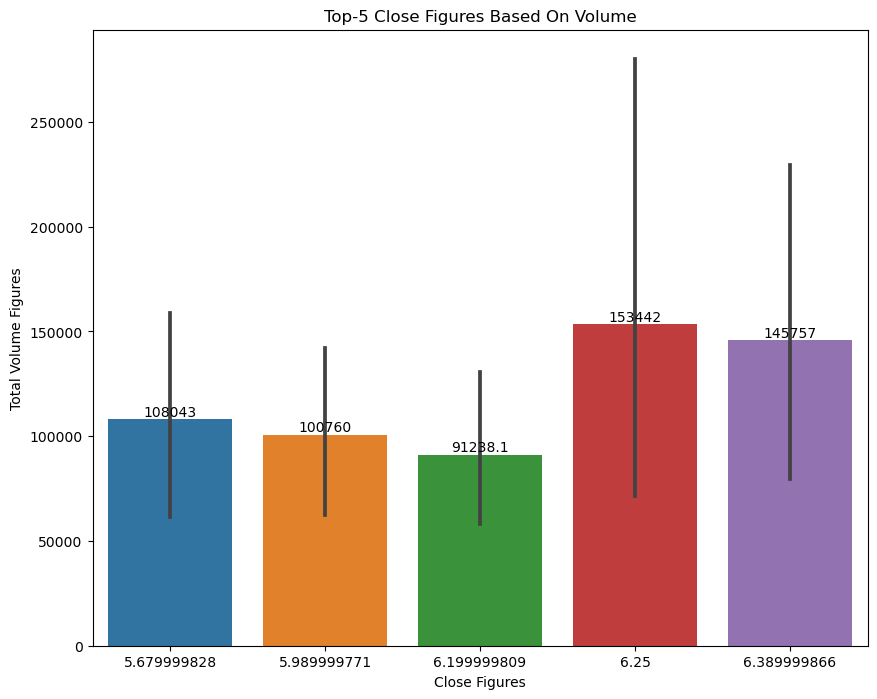

In [24]:
#5. Find out the Top 5 Close Figures Based On Volume.
top5 = df['close'].value_counts().nlargest(5).index
df_top5 = df[df['close'].isin(top5)]

plt.figure(figsize = (10,8))
ax = sns.barplot(x = 'close' , y = 'volume' , data = df_top5)
ax.bar_label(ax.containers[0])
plt.xlabel('Close Figures')
plt.ylabel('Total Volume Figures')
plt.title('Top-5 Close Figures Based On Volume')
plt.show()

# Conclusion

In the above graph, the "6.25" Close Figure is the highest Close Figure than other 4 Close Figures.

Thank You!